# Статистика, прикладной поток
## Практическое задание

В данном задании вы изучите свойства метода Монте-Карло, сравнив его с методом прямоугольков. Также с помощью метода Монте-Карло вы решите задачу, которая возникает при составлении проекта по разработке нефтяного месторождения. Знания физики или экономики не требуются.

**Правила:**

* Дедлайн **26 сентября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 1 балл
* Задача 2 - 10 баллов
* Задача 3 - 10 баллов
* Задача 4 - 5 баллов
* Задача 5 - 20 баллов

Все задачи имеют тип **O3**. Подробнее см. в правилах выставления оценки.

**Задача 1.** Найдите книгу Савельев В. "Статистика и котики" и прочитайте главы 1 и 2. Какие выводы можно сделать?

**Вывод:** Статистика - это зумурчательно!

**Задача 2.** Реализуйте метод Монте-Карло и метод прямоугольников численного интегрирования функции. Реализация должна уметь вычислять интеграл вида:
$$ \int\limits_{l_1}^{h_1} ... \int\limits_{l_d}^{h_d} f(x_1, ... , x_d) dx_1 ... dx_d $$

*Детали реализации*: на вход функции подаются векторы $l = (l_1, ... , l_d)$ и $h = (h_1, ... ,h_d)$, число $n$ -- максимальное допустимое число вызовов функции $f$ (если вы не делаете лишних вызовов, оно равно числу точек-центров отрезков, прямоугольников, параллелипипедов, и т.д. в многомерных случаях). Использование циклов, кроме циклов по числу интегралов $d$, **наказуемо**. Используйте функции `numpy.meshgrid` и `numpy.vectorize` для быстрой скорости работы.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

Пример использования <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html"> `numpy.vectorize`</a>.

In [2]:
def vector_function(x):
    """Получает на вход вектор некоторой длины n, возвращает число.
    Сигнатуру можно записать как (n)->()"""
    return x.sum()

f = np.vectorize(vector_function, signature="(n)->()")
arg = np.arange(10).reshape(-1, 2)
arg

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [3]:
f(arg)  # вычисляет суммы по строкам

array([ 1,  5,  9, 13, 17])

Пример использования <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html">`numpy.meshgrid`</a>. Как всегда, настоятельно советуем читать документацию.

In [4]:
# координаты точек на некоторой координатной оси
linspace_x = [1, 2, 3]  
linspace_y = [-1, -2, -3]  

# возвращает матрицы с координатами сетки,
# задаваемой проекциями точек на оси координат
X, Y = np.meshgrid(linspace_x, linspace_y)

# преобразуем исходный формат к вектору точек
np.stack([X, Y]).reshape(2, -1).T

array([[ 1, -1],
       [ 2, -1],
       [ 3, -1],
       [ 1, -2],
       [ 2, -2],
       [ 3, -2],
       [ 1, -3],
       [ 2, -3],
       [ 3, -3]])

In [5]:
class Integrator: 
    @staticmethod
    def integrate(f, low, high, n, method="rectangle"):
        """Вычисление интеграла.
        f - функция многих переменных, на вход принимает вектор;
        low - нижние границы (в том же порядке, в котором 
                              функция принимает аргументы);
        high - верхние границы (аналогично);
        n - максимальное число вызовов функции f;
        method - метод ("rectangle" или "monte_carlo", 
                            см. Integrator.methods);
        """
        
        assert len(low) == len(high)
        low, high = map(np.array, [low, high])
        n = int(n)

        return Integrator.methods[method](f, low, high, n)
    
    def integrate_monte_carlo(f, low, high, n):
        """Метод монте-карло"""
            
        # количество интегрлов
        d = len(low)
        
        # Изменяем формат на вектор-столбцы
        #low = np.array(low).reshape(d, 1)
        #high = np.array(high).reshape(d, 1)
        
        # случайные точки, в которых будем вычислять функцию
        dots = sps.uniform.rvs(size=(n, d)) * (high - low) + low
        
        # вычисление функции в случайных точках
        np_f = np.vectorize(f, signature="(n)->()")
        f_values = np_f(dots)

        # ответ
        return f_values.mean()
    
    def integrate_rectangle(f, low, high, n):
        """Метод прямоугольников"""
        # количество интегрлов
        d = len(low)
        
        # число точек для каждой координаты
        n_for_one_dim = int(n ** (1 / d))
        
        if not n_for_one_dim:
            return 0
        
        # разбиения отрезков интегрирования на равные отрезки
        ranges = []
        for (a, b) in zip(low, high):
            sigment_length = 1. * (b - a) / (n_for_one_dim)
            ranges.append(a + np.arange(n_for_one_dim + 1) * sigment_length)
        ranges = np.array(ranges)
        
        # вычисление центров этих разбиений
        ranges_of_centers = []
        for dim_grid in ranges:
            ranges_of_centers.append((dim_grid[1:] + dim_grid[:-1]) / 2)
        
        # получение всех точек сетки через вызов np.meshgrid
        centers = np.stack(np.meshgrid(*ranges_of_centers)).reshape(d, -1).T
        
        # длины длины отрезков по каждой координате
        block_lengths = (high - low) * 1. / n_for_one_dim
        
        # вычисление значение функции в точках сетки
        np_f = np.vectorize(f, signature="(n)->()")
        f_values = np_f(centers) * block_lengths.prod()

        # ответ
        return f_values.sum()
    
    methods = {
        "rectangle": integrate_rectangle,
        "monte_carlo": integrate_monte_carlo
    }

Вычислите $\int\limits_0^1 \int\limits_3^4 \left(x^2 + y^2\right) dxdy$ на миллионе запусков функции $f(x, y) = x^2+y^2$ двумя рассмотренными методами. Измерьте время работы методов и сравните результат с истинными значением интеграла. Различается ли время работы методов?

In [6]:
def f(x):
    return (x ** 2).sum()

low = [0, 3]
high = [1, 4]
n = 10 ** 6
INTEGRAL_VALUE = 12 + 2. / 3

In [7]:
%%time
# Считаем интегралом методом Монте-Карло
monte_carlo = Integrator.integrate(f, low, high, n, "monte_carlo")
print("Integral by monte-carlo: ", monte_carlo)
print("Difference:", abs(monte_carlo - INTEGRAL_VALUE))

Integral by monte-carlo:  12.663672327054599
Difference: 0.0029943396120675203
CPU times: user 8.45 s, sys: 4 ms, total: 8.45 s
Wall time: 8.46 s


In [8]:
%%time
# А теперь методом прямоугольников
rectangle = Integrator.integrate(f, low, high, n, "rectangle")
print("Integral by rectangle method: ", rectangle)
print("Difference:", abs(rectangle - INTEGRAL_VALUE))

Integral by rectangle method:  12.666666499999998
Difference: 1.6666666802223062e-07
CPU times: user 7.79 s, sys: 8 ms, total: 7.8 s
Wall time: 7.79 s


**Комментарий:** Оба метода отработали за схожее время. А значит при маленьком количествве интегралов удобнее использовать метод прямоугольников, так как у него погрешность ~ $10^{-7}$, в отличие Монте-Карло с погрешностью $10^{-3}$


**Задача 3.** Для $d = 1...8$ оцените скорость сходимости методов для интеграла
$$\int\limits_0^1 ... \int\limits_0^1 \sum_{i=1}^{d} x_i^2 \prod_{i=1}^{d}dx_i$$

Т.е. $\int\limits_0^1 x_1^2 dx_1$, $\int\limits_0^1 \int\limits_0^1 \left( x_1^2 + x_2^2 \right) dx_1 dx_2$ и так далее. 

Вычислите точное значение этого интеграла и для каждого $d$ постройте график зависимости вычисленного значения интеграла от числа $n = d \times 1000$ вызовов подынтегральной функции (в корректном решении равно числу точек-центров), которое разрешено использовать для каждого метода вычисления интеграла. На графике укажите точное значение интеграла. Для наглядности графики рекомендуется расположить в два столбика.

Какой метод и при каких $d$ сходится быстрее? Предположите, в каком случае выгоднее использовать тот или иной метод.

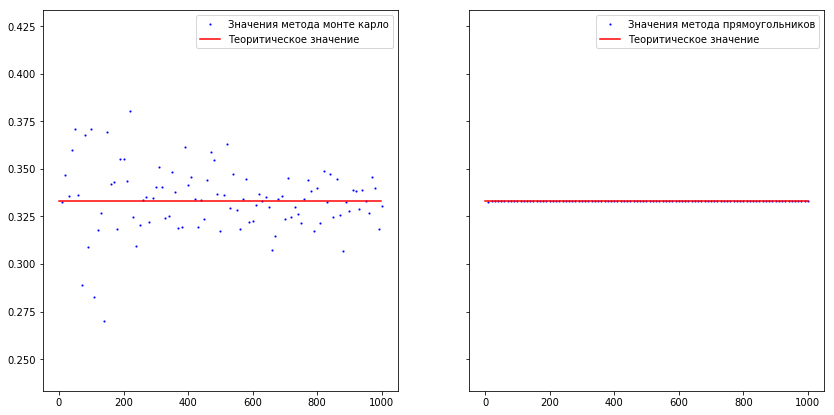

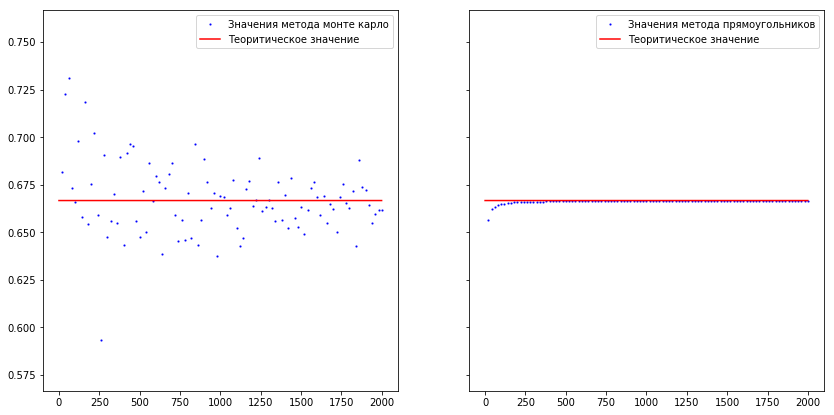

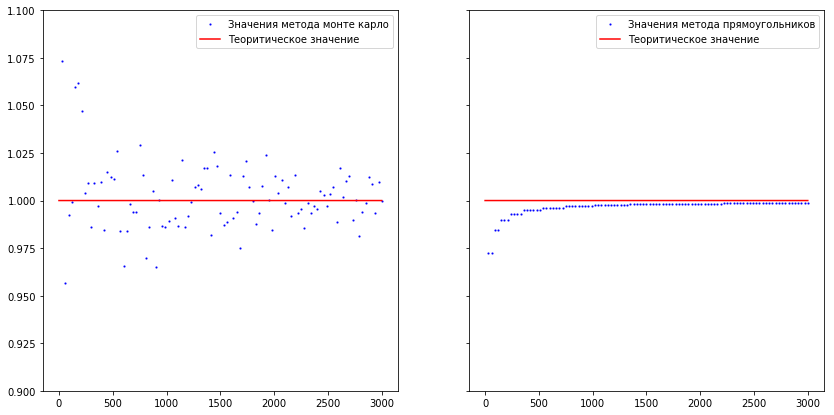

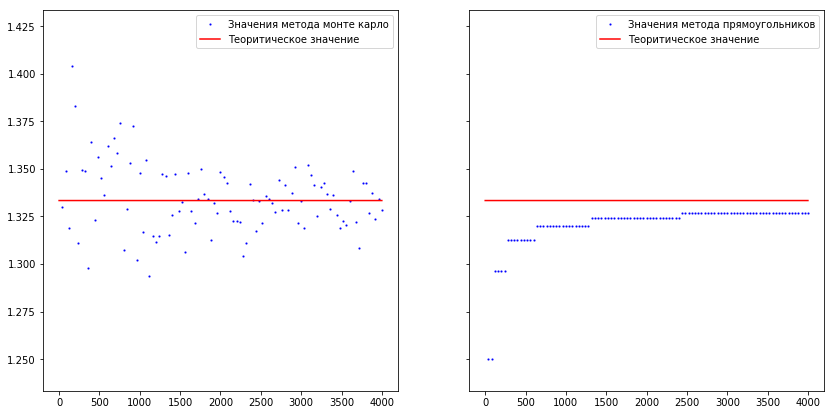

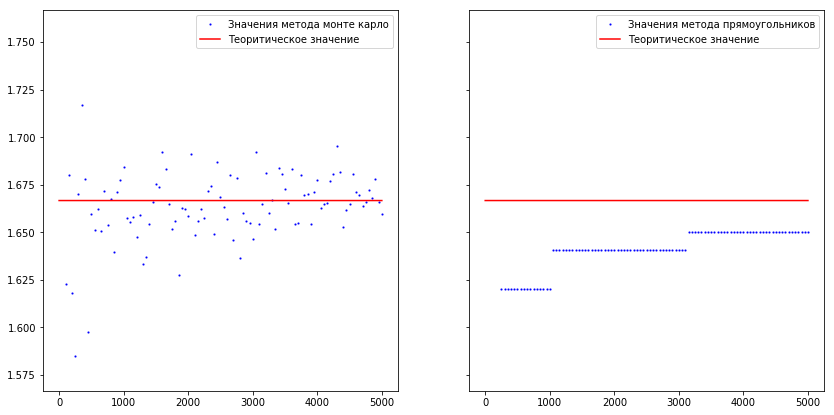

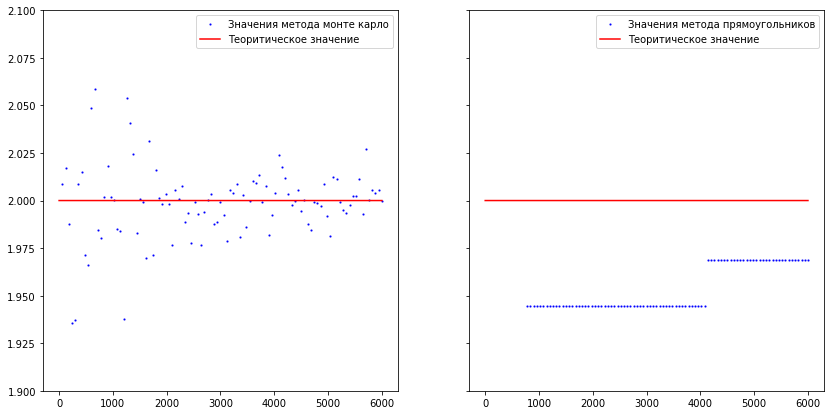

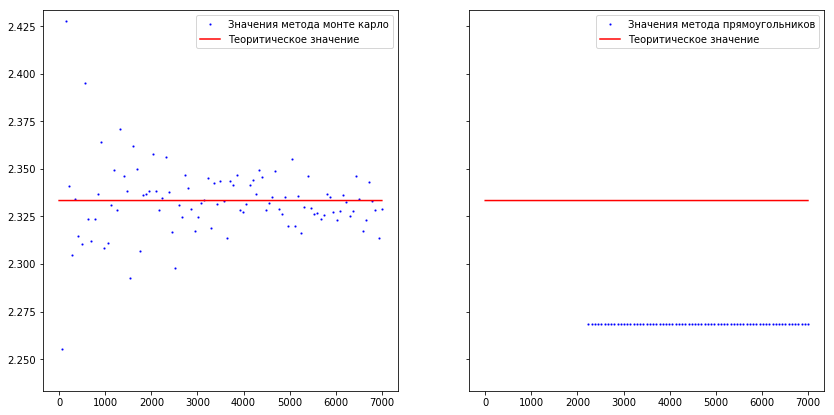

In [9]:
def plot_convergence(f, low, high, n_list, theoretical_value):
    """Строим графики сходимости.
    f - функция многих переменных, на вход принимает вектор;
    low - нижние границы (в том же порядке, в котором 
                          функция принимает аргументы);
    high - верхние границы (аналогично);
    n_list - список;
    theoretical_value - точное значение интеграла.
    """
    
    y_monte_carlo = [Integrator.integrate(f, low, high, n, "monte_carlo") for n in n_list]
    y_rectangle = [Integrator.integrate(f, low, high, n, "rectangle") for n in n_list]
    
    tmp, (axe1, axe2) = plt.subplots(1, 2, sharey=True)
    tmp.set_figheight(7)
    tmp.set_figwidth(14)
    
    axe1.set_ylim(theoretical_value - 0.1, theoretical_value + 0.1)
    axe2.set_ylim(theoretical_value - 0.1, theoretical_value + 0.1)
    
    axe1.plot(n_list, y_monte_carlo, 'bs', ms=1, label="Значения метода монте карло", alpha=1)
    axe1.plot(np.ones((n_list[-1], 1)) * theoretical_value, color='r', label="Теоритическое значение", alpha=1)
    axe1.legend()
    
    axe2.plot(n_list, y_rectangle, 'bs', ms=1, label="Значения метода прямоугольников", alpha=1)
    axe2.plot(np.ones((n_list[-1], 1)) * theoretical_value, color='r', label="Теоритическое значение", alpha=1)
    
    axe2.legend()
    plt.show()

    
for d in range(1, 8):
    grid = 10 * d * np.arange(1, 101)
    plot_convergence(f, np.zeros(d), np.ones(d), grid, d/3)

**Вывод:** Можно заметить, что при росте размерности лучшую сходимость показывает метод Монте-Карло. Это логично, ведь для метода прямоугольников для формированиея плотной сетки разбиения облости требуется больше точек, а соответственно больше вызовов функции

**Задача 4.** Вам предлагается численно вычислить многомерный интеграл Пуассона для $d=5$ и некоторой симметричной положительно определенной матрицы $A$, которую вы выберете сами. Зависит ли интеграл от выбора $A$? 
$$\int\limits_{\mathbb{R}^n} exp( - x^T A x) dx $$

Сравните результаты двух методов с истинным значением интеграла. Как вы думаете, какой метод выдает более точный результат? Количество итераций каждого метода должно быть не менее $10^6$.

In [14]:
d_value = 5

def g(x):
    A = np.eye(d_value)
    return np.exp(-x.T.dot(A).dot(x))
    
answer = np.pi ** (5 / 2)
times = 1000000
widths = [5, 10, 30]
for width in widths:
    low = np.ones(d_value) * (-width)
    high = np.ones(d_value) * width
    m_k_result = Integrator.integrate(g, low, high, times, "monte_carlo")
    r_result = Integrator.integrate(g, low, high, times, "rectangle")

    print("интегрируем от -" + str(width) + " до +" + str(width))
    print("Значение метода монте-карло: \t " + str(m_k_result))
    print("Ошибка метода монте-карло: \t " + str(abs(answer - m_k_result)))
    print("Значение метода прямоугольников: " + str(r_result))
    print("Ошибка метода прямоугольников: \t " + str(abs(answer - r_result)))
    print()

интегрируем от -5 до +5
Значение метода монте-карло: 	 0.00017483738843879955
Ошибка метода монте-карло: 	 17.493243490236424
Значение метода прямоугольников: 17.493418367284356
Ошибка метода прямоугольников: 	 3.9659493467070206e-08

интегрируем от -10 до +10
Значение метода монте-карло: 	 5.5141089214096556e-06
Ошибка метода монте-карло: 	 17.493412813515942
Значение метода прямоугольников: 18.18296657530806
Ошибка метода прямоугольников: 	 0.6895482476831987

интегрируем от -30 до +30
Значение метода монте-карло: 	 2.138847642478504e-07
Ошибка метода монте-карло: 	 17.4934181137401
Значение метода прямоугольников: 1024.0011523607077
Ошибка метода прямоугольников: 	 1006.5077340330828



**Комментарий:** Можно понять, что при увеличении области интегрирования, значение метода прямоугольников стремится к бесконечности из-за того, что увеличивается площадь квадратиков, а метод монте-карло к нулю.

Рассмотрим отношение интегралов $$F(t) = \frac{ \int\limits_{-\infty}^{t_1} ... \int\limits_{-\infty}^{t_k} exp \left( - \frac12 x^T A x \right) dx}{ \int\limits_{\mathbb{R}^n} exp \left( - \frac12 x^T A x \right) dx} $$
В чем его вероятностный смысл?

**Ответ:** Это функция распределения многомерного нормального распределения.

### **Задача 5.** В заключении рассмотрения метода Монте-Карло вам предлагается реальная практическая задача.

На основе http://ecsocman.hse.ru/data/819/759/1219/Monte_Karlo_dlya_analitikov.pdf
 	
Рассмотрим проект по разработке нефтяного месторождения. В основе модели проекта лежат предварительные данные о величине резервов месторождения.

*Замечание.* Знания физики или экономики не требуются.



*Формулировка задачи от заказчика:*
Общая задача анализа --- основываясь на величине запасов и проценте нефтеотдачи рассчитать NPV (чистая приведенная стоимость) проекта, а точнее, $0.1$-квантиль ее распределения.
Следующим этапом мы хотим использовать ее в качестве критерия оптимизации, то есть максимизировать такое значение NPV, которого мы можем достигнуть или превысить с $90\%$-й вероятностью, подобрав при этом оптимальное количество скважин на месторождении.



Предположим, что на месторождении есть $25$ скважин. Эти скважины добывают некоторую смесь, которая состоит из воды, нефти и различных примесей. Доля нефти из добытого материала называется <a href="https://ru.wikipedia.org/wiki/Нефтеотдача">коэффициентом нефтеотдачи</a> $k$. Мы будем считать, что этот коэффициент является одинаковым для всего месторождения и имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$.




**Добыча нефти скважиной за год**

<a href="http://vseonefti.ru/upstream/stadii-razrabotki.html">Разработка месторождения</a> включает три этапа:
1. фаза роста добычи --- период введения в работу новых скважин;
2. фаза плато: после достижения определенного уровня добычи, она некоторое время продолжается на постоянном уровне;
3. фаза снижения добычи --- период, когда темпы добычи экспоненциально снижаются с течением времени.


Для упрощения задачи мы пропустим два первых этапа и рассмотрим только последний.


Каждая скважина $j$ характеризуется параметром $q_j$ --- темп добычи из скважины, определяемый объемом вещества (смесь нефти, воды и др.), добываемого скважиной за сутки. Будем считать, что этот параметр является одинаковым для скважины в течении всего периода разработки и имеет нормальное распределение со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей. Темпы добычи для разных скважин считаются независимыми случайными величинами.

Соответственно, за год $t$ скважина добывает $Q_{tj} = 365 \cdot k \cdot q_j \cdot e^{-0.2 (t-1)}$ тыс. баррелей нефти, где экспонента отвечает за снижение добычи с течением времени.
Всего за год $t$ на месторождении добывается $Q_t = \sum\limits_{j=1}^{25} Q_{tj}$ тыс. баррелей нефти.




**Прибыль**

Стоимость барреля нефти будем считать постоянной и равной $c = 70$ долларов за баррель. Однако, для расчета стоимости нужно учесть <a href="https://ru.wikipedia.org/wiki/Ставка_дисконтирования">ставку дисконтирования</a> --- процентная ставка, используемая для пересчета будущих потоков доходов в единую величину текущей стоимости (см. формулу далее). Обозначим ее $i$ и будем считать, что она имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$.

Стоимость добытой нефти за год $t$ составит (тыс. баррелей)
$$\frac{c \cdot Q_t}{(1+i)^{t-1}}.$$

Будем считать, что разработка месторождения прекращается, если за год на всем месторождении было добыто менее $100$ тыс. баррелей нефти. Последний год разработки обозначим $T$.




**Затраты**

Затраты на месторождение (кроме скважин) составляют $C_{\text{мест.}} = 200$ млн. долларов в год. Будем считать, что издержки на содержание скважины $j$ за весь период разработки имеют треугольное распределение (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html">scipy.stats.triang</a>) c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. Обозначим эти случайные величины $C^j_{\text{скв.}}$ и будем считать их независимыми.




**NPV**

Теперь мы можем написать формулу NPV
$$NPV = \sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} - T \cdot C_{\text{мест.}} - \sum\limits_{j=1}^{25} C^j_{\text{скв.}}.$$




**Задание**

С помощью метода Монте-Карло требуется найти число $x$, при котором $$\mathsf{P}(NPV < x) = 0.1.$$

Количество итераций метода должно быть не менее $100\ 000$. На основе проделанных итераций оцените также среднее значение NPV и вероятность, с которой NPV будет положительна. Кроме того, постройте нормированную гистограмму значений NPV с помощью `plt.hist(values, bins=200, normed=True)`.



Перечислим еще раз все *случайные параметры*:
* Коэффициент нефтеотдачи $k$ имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$;
* $q_1, ..., q_{25}$ --- темпы добычи из скважин --- независимые нормальные случайные величины со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей;
* Ставка дисконтирования $i$ имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$;
* $C^1_{\text{скв.}}, ..., C^{25}_{\text{скв.}}$ --- затраты на каждую скважину --- независимые  случайные величины, имеющие треугольное распределение c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. (используйте `sps.triang(loc=90, c=1/3, scale=30)`)

*Фиксированные параметры*:
* $25$ скважин;
* $365$ дней в году;
* $c=70$ долларов за баррель --- стоимость нефти;
* $100$ тыс. баррелей --- объем добытой нефти за год, при котором разработка месторождения прекращается.
* $200$ млн. долларов в год --- затраты на месторождение.



In [11]:
# число выполнения эксперимента
times =  10 ** 5
# число скважин
n = 25
# число дней в году
days_in_year = 365.
# стоимость нефти --- долларов за баррель
c = 70.
# объём добытой нефти, при котором разработка прекращается (в баррелях)
boarder_volume = 10**5
# ежегодные затраты на месторождение в долларах
annual_spending = 2. * 10**8

# Коэффициент нефтеотдачи
k = sps.norm(loc=0.42, scale=0.012).rvs((times, 1))
# Темпы добычи из скважин
q = sps.norm(loc=10 ** 4, scale=3 * 10 ** 3).rvs(size=(times, 25))
# Ставка дисконтирования
i = sps.norm(loc=0.1, scale = 0.012).rvs(size=(times, 1))
# Затраты на скважины
C = sps.triang(loc=9 * 10 ** 7, c=1/3, scale=3 * 10 ** 7).rvs(size=(times, 25))

Найдём количество дней за которое истощится месторождение:


In [12]:
# общий темп добычи:
q_total = q.sum(axis=1).reshape((times, 1))
T = (5. * np.log(days_in_year * k * q_total / boarder_volume) + 1).astype(int) + 1

Хотим посчитать стоимость добытой нефти за всё время:
$$\sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} 
= \sum\limits_{t=1}^T \frac{c \cdot 365 \cdot k \cdot q_{total} \cdot e^{-0.2 (t-1)}}{(1+i)^{t-1}} 
= c \cdot 365 \cdot k \cdot q_{total}\sum\limits_{t=1}^T \frac{1}{((1+i)e^{0.2})^{t-1}}
= c \cdot 365 \cdot k \cdot q_{total} \frac{1-((1+i)e^{0.2})^{-T}}{1-\frac{1}{(1+i)e^{0.2}}}$$

С 10% вероятностью NPV < 744 миллионов $
Среднее значение NPV:	 1681 миллионов $
вероятность убытков:	 0.684 %


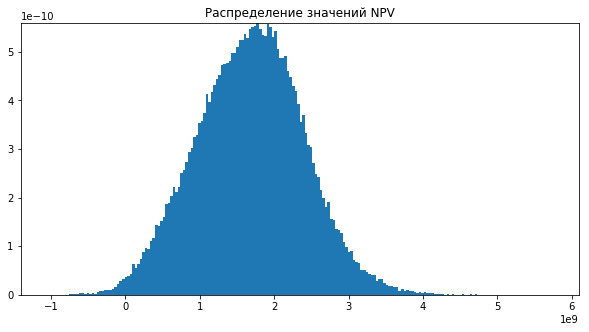

In [13]:
d = (1. + i) * np.exp(0.2)
D = (1. - d ** (-T))/ (1 - d ** (-1))
NPV = c * days_in_year * k * q_total * D
NPV = NPV - T * annual_spending - C.sum(axis=1).reshape((times, 1))
NPV = NPV.reshape(times)
NPV.sort()


print ("С 10% вероятностью NPV < " + str(int(NPV[times // 10] / 10**6)) + " миллионов $")
print ("Среднее значение NPV:\t " + str(int(NPV.mean() / 10**6)) + " миллионов $")
print ("вероятность убытков:\t " + str(100 * np.searchsorted(NPV, 0) / times) + " %")

plt.figure(figsize=(10.0, 5.0))
plt.title("Распределение значений NPV")
n, bins, patches = plt.hist(NPV, bins=200, normed=True)

**Вывод:** Можно заметить, что величина NPV имеет распределение, близкое к нормальному, причём большая доля значений получается неотрицательной